# EDA para clasificacion segun el tipo de vino (RED - WHITE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('max_columns',None)

In [3]:
df_wr = pd.read_csv('winequality-red.csv', sep=';')
df_wr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_ww= pd.read_csv('winequality-white.csv', sep=';')
df_ww.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
print("Dimensiones del dataset de vino rojo: ",df_wr.shape)
print("Dimensiones del dataset de vino blanco: ", df_ww.shape)

Dimensiones del dataset de vino rojo:  (1599, 12)
Dimensiones del dataset de vino blanco:  (4898, 12)


| Variables | Descripcciòn |
|-----------|--------------|
|fixed acidity| most acids involved with wine or fixed or nonvolatile (do not evaporate readily).|
|volatile acidity| the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.|
|citric acid| found in small quantities, citric acid can add ‘freshness’ and flavor to wines.|
|residual sugar| the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.|
|chlorides| the amount of salt in the wine.|
|free sulfur dioxide| the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.|
|total sulfur dioxide| amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.|
|density| the density of water is close to that of water depending on the percent alcohol and sugar content.|
|pH| describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.|
|sulphates| a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.|
|alcohol| the percent alcohol content of the wine.|

### Vamos a combinar ambos dataset, asi que antes de hacerlos, creamos una nueva columna en cada uno donde se sepa que tipo de vino es: Rojo o Blanco

In [6]:
df_wr['type'] = 'Red'
df_ww['type'] = 'White'

In [7]:
df_ww.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,White


In [8]:
df_wr.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [9]:
df_wines = pd.concat([df_ww,df_wr], ignore_index= True)

In [10]:
df_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,White
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,White
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,White
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,White


In [11]:
df_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Red
6496,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6,Red


In [12]:
df_wines.shape

(6497, 13)

### Ahora contamos con un dataset de 6497 filas y 13 columnas, recordemos que se agregò una columna adicional para diferenciar el tipo de vino: Rojo o blanco.

In [13]:
df_wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
df_wines['type'] = df_wines['type'].astype('category')

In [15]:
df_wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

#### No cuenta con datos nulos

In [16]:
df_wines[df_wines.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,White
5,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,White
7,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,White
8,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,White
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6461,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,Red
6462,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,Red
6465,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,Red
6479,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5,Red


#### Cuenta con 1177 datos duplicados. Procedemos a eliminarlos, manteniendo uno de las filas.

In [17]:
df_wines = df_wines.drop_duplicates(keep='first')

In [18]:
df_wines.shape

(5320, 13)

#### Se observa que se redujo la cantidad de filas, de 6497 a 5320. Los 1177 datos duplicados fueron eliminados.

## Al eliminar las filas duplicadas me surgiò la siguiente pregunta. ¿Existirà un vino rojo y un vino blanco con las mismas caracteristicas?

In [19]:
df_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [20]:
df_wines[df_wines.duplicated(subset=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5734,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,Red
6029,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,Red


In [21]:
df_wines[(df_wines['fixed acidity'] == 6.7) & (df_wines['volatile acidity'] == 0.28) & (df_wines['citric acid'] == 0.28) & (df_wines['residual sugar'] == 2.4) & (df_wines['chlorides'] == 0.012) & (df_wines['free sulfur dioxide'] == 36.0) & (df_wines['total sulfur dioxide'] == 100.0) & (df_wines['density'] == 0.99064 ) & (df_wines['pH'] == 3.26) & (df_wines['sulphates'] == 0.39) & (df_wines['alcohol'] == 11.7) & (df_wines['quality'] == 7)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2631,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,White
5734,6.7,0.28,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,Red


In [22]:
df_wines[(df_wines['fixed acidity'] == 5.9) & (df_wines['volatile acidity'] == 0.19) & (df_wines['citric acid'] == 0.21) & (df_wines['residual sugar'] == 1.7) & (df_wines['chlorides'] == 0.045) & (df_wines['free sulfur dioxide'] == 57.0) & (df_wines['total sulfur dioxide'] == 135.0) & (df_wines['density'] == 0.99341 ) & (df_wines['pH'] == 3.32) & (df_wines['sulphates'] == 0.44) & (df_wines['alcohol'] == 9.5) & (df_wines['quality'] == 5)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3374,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,White
6029,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5,Red


#### Demostramos que si pueden existir tanto vino blanco como vino rojo con las mismas caracteristicas, por consiguiente podriamos pensar que para clasificar un vino segun su tipo puede haber confusion por la ambiguedad.

<AxesSubplot:xlabel='type'>

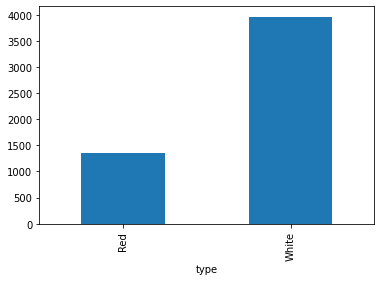

In [23]:
df_wines.groupby('type').size().plot.bar()

#### De igual forma, segùn el comportamiento del resto de datos... ¿Serà posible implementar un algortimos para clasificar un vino segun su tipo: Rojo o Blanco, con buenos resultados? 

In [24]:
from scipy.stats import mannwhitneyu

### Con cada una de las variables segun cada tipo de vino ¿Existe una diferencia significativa entre poblaciones?

Para ello, se implementarà el U-test para saber si hay diferencia significativa entre el vino rojo y vino blanco en cada variable para utilizarla en el algoritmo de clasificacion.


Hipótesis


H0: la probabilidad de que una observación de la población A sea mayor que una observación de la población B es igual que la probabilidad de que una observación de la población B sea mayor que una observación de la población A.

Ha: la probabilidad de que una observación de la población A sea mayor que una observación de la población B no es igual que la probabilidad de que una observación de la población B sea mayor que una observación de la población A. 

#### Fixed acidity

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

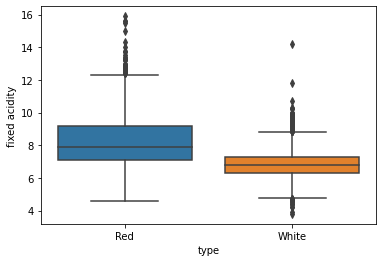

In [52]:
sns.boxplot(x='type', y='fixed acidity' ,data=df_wines)

std:  1.3196706812560997


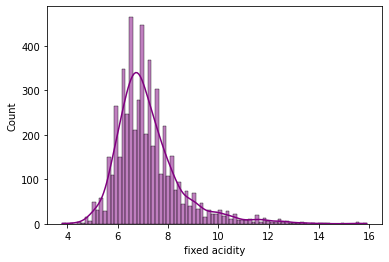

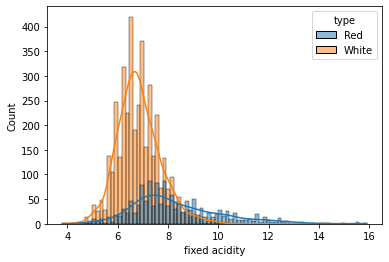

,fa_red,fa_white
count,1359.000000,3961.000000
mean,8.310596,6.839346
std,1.736990,0.866860
min,4.600000,3.800000
25%,7.100000,6.300000
50%,7.900000,6.800000
75%,9.200000,7.300000
max,15.900000,14.200000


In [25]:
print("std: ",df_wines['fixed acidity'].std())
sns.histplot(x =df_wines['fixed acidity'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'fixed acidity', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_fixed_acidity = pd.concat([df_wines[df_wines['type'] == 'Red']['fixed acidity'].describe(), df_wines[df_wines['type'] == 'White']['fixed acidity'].describe()], axis=1)
descriptive_fixed_acidity.columns= ['fa_red','fa_white']
descriptive_fixed_acidity

Para 'fixed acidity' observamos que el vino rojo tiene mas rango que el vino blanco. Este ultimo presenta dos outliers bastante alejados de su distribucion, por lo que procedemos a eliminarlos.

In [65]:
df_wines[((df_wines['type'] == 'White') & (df_wines['fixed acidity'] > 11))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1526,14.2,0.27,0.49,1.1,0.037,33.0,156.0,0.9920,3.15,0.54,11.1,6,White
2050,11.8,0.23,0.38,11.1,0.034,15.0,123.0,0.9997,2.93,0.55,9.7,3,White


In [66]:
df_wines = df_wines[~((df_wines['type'] == 'White') & (df_wines['fixed acidity'] > 11))]

<AxesSubplot:xlabel='type', ylabel='fixed acidity'>

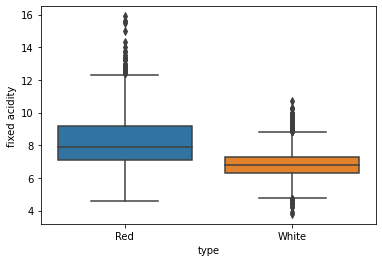

In [67]:
sns.boxplot(x='type', y='fixed acidity' ,data=df_wines)

Efectivamente los dos valores bastante extremos del vino blanco fueron eliminados. Podemos ver que la mediana  de ambos tipos de vino tienen diferencia, aunque el rango del vino blanco esta dentro del rango de valores del vino rojo.

#### Volatile acidity

std:  0.168248260213208


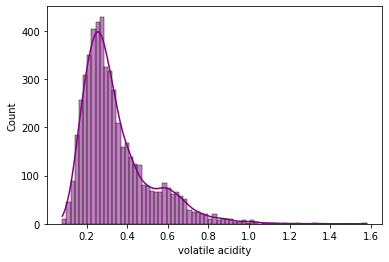

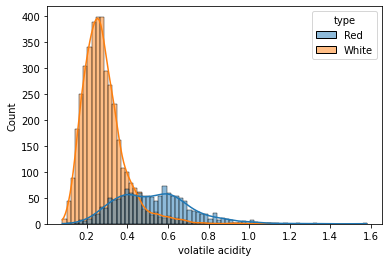

,va_red,va_white
count,1359.000000,3961.000000
mean,0.529478,0.280538
std,0.183031,0.103437
min,0.120000,0.080000
25%,0.390000,0.210000
50%,0.520000,0.260000
75%,0.640000,0.330000
max,1.580000,1.100000


In [27]:
print("std: ",df_wines['volatile acidity'].std())
sns.histplot(x =df_wines['volatile acidity'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'volatile acidity', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_volat_acidity = pd.concat([df_wines[df_wines['type'] == 'Red']['volatile acidity'].describe(), df_wines[df_wines['type'] == 'White']['volatile acidity'].describe()], axis=1)
descriptive_volat_acidity.columns= ['va_red','va_white']
descriptive_volat_acidity

<AxesSubplot:xlabel='type', ylabel='volatile acidity'>

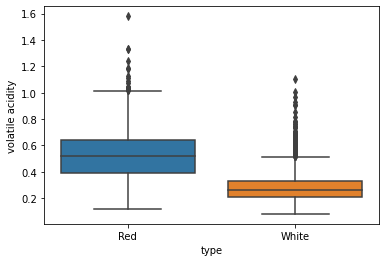

In [53]:
sns.boxplot(x='type', y='volatile acidity' ,data=df_wines)

In [69]:
df_wines[((df_wines['type'] == 'Red') & (df_wines['volatile acidity'] > 1.4))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6197,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3,Red


In [70]:
df_wines = df_wines[~((df_wines['type'] == 'Red') & (df_wines['volatile acidity'] > 1.4))]

#### Citric acid

std:  0.1471573342924657


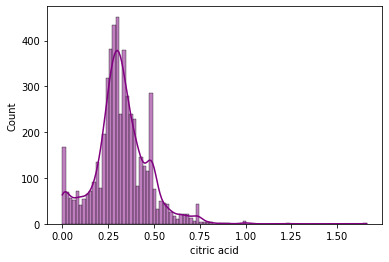

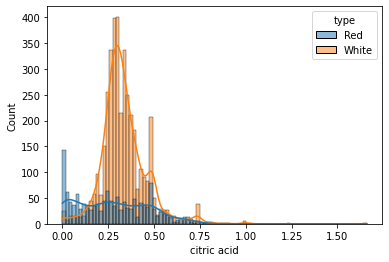

,ca_red,ca_white
count,1359.000000,3961.000000
mean,0.272333,0.334332
std,0.195537,0.122446
min,0.000000,0.000000
25%,0.090000,0.270000
50%,0.260000,0.320000
75%,0.430000,0.390000
max,1.000000,1.660000


In [29]:
print("std: ",df_wines['citric acid'].std())
sns.histplot(x =df_wines['citric acid'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'citric acid', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_citric_acidity = pd.concat([df_wines[df_wines['type'] == 'Red']['citric acid'].describe(), df_wines[df_wines['type'] == 'White']['citric acid'].describe()], axis=1)
descriptive_citric_acidity.columns= ['ca_red','ca_white']
descriptive_citric_acidity

<AxesSubplot:xlabel='type', ylabel='citric acid'>

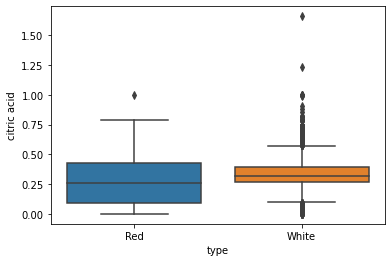

In [54]:
sns.boxplot(x='type', y='citric acid' ,data=df_wines)

In [72]:
df_wines[((df_wines['type'] == 'Red') & (df_wines['citric acid'] > 0.9))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5049,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4,Red


In [73]:
df_wines = df_wines[~((df_wines['type'] == 'Red') & (df_wines['citric acid'] > 0.9))]

In [74]:
df_wines[((df_wines['type'] == 'White') & (df_wines['citric acid'] > 1))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
745,7.4,0.20,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,White
3152,7.6,0.25,1.23,4.6,0.035,51.0,294.0,0.99018,3.03,0.43,13.1,6,White


In [75]:
df_wines = df_wines[~((df_wines['type'] == 'White') & (df_wines['citric acid'] > 1))]

#### Residual sugar

std:  4.500180119377681


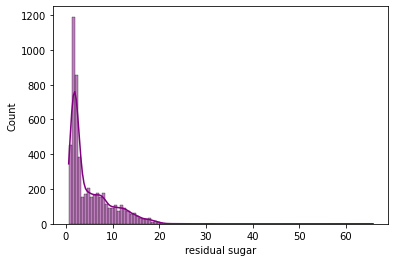

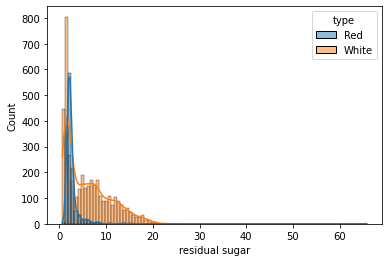

,rs_red,rs_white
count,1359.000000,3961.000000
mean,2.523400,5.914819
std,1.352314,4.861646
min,0.900000,0.600000
25%,1.900000,1.600000
50%,2.200000,4.700000
75%,2.600000,8.900000
max,15.500000,65.800000


In [31]:
print("std: ",df_wines['residual sugar'].std())
sns.histplot(x =df_wines['residual sugar'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'residual sugar', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_residual_sugar = pd.concat([df_wines[df_wines['type'] == 'Red']['residual sugar'].describe(), df_wines[df_wines['type'] == 'White']['residual sugar'].describe()], axis=1)
descriptive_residual_sugar.columns= ['rs_red','rs_white']
descriptive_residual_sugar

<AxesSubplot:xlabel='type', ylabel='residual sugar'>

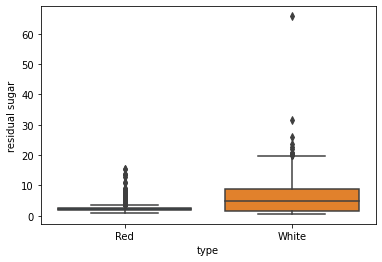

In [55]:
sns.boxplot(x='type', y='residual sugar' ,data=df_wines)

In [76]:
df_wines[((df_wines['type'] == 'White') & (df_wines['residual sugar'] > 30))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
1653,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,White
2781,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6,White


In [77]:
df_wines = df_wines[~((df_wines['type'] == 'White') & (df_wines['residual sugar'] > 30))]

#### Chlorides

std:  0.036863314781293476


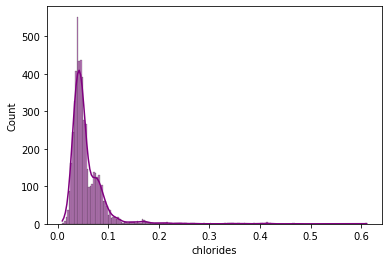

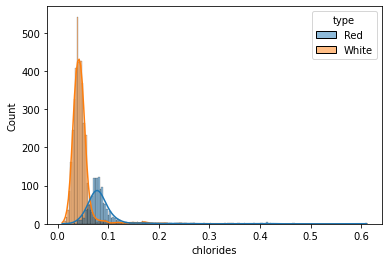

,c_red,c_white
count,1359.000000,3961.000000
mean,0.088124,0.045905
std,0.049377,0.023103
min,0.012000,0.009000
25%,0.070000,0.035000
50%,0.079000,0.042000
75%,0.091000,0.050000
max,0.611000,0.346000


In [33]:
print("std: ",df_wines['chlorides'].std())
sns.histplot(x =df_wines['chlorides'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'chlorides', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_chlorides = pd.concat([df_wines[df_wines['type'] == 'Red']['chlorides'].describe(), df_wines[df_wines['type'] == 'White']['chlorides'].describe()], axis=1)
descriptive_chlorides.columns= ['c_red','c_white']
descriptive_chlorides

<AxesSubplot:xlabel='type', ylabel='chlorides'>

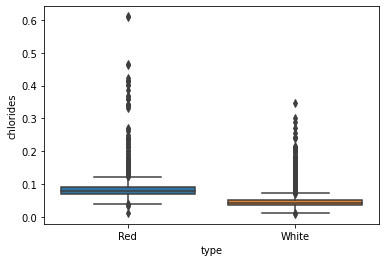

In [56]:
sns.boxplot(x='type', y='chlorides' ,data=df_wines)

In [80]:
df_wines[((df_wines['type'] == 'Red') & (df_wines['chlorides'] > 0.5))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5156,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5,Red


In [81]:
df_wines = df_wines[~((df_wines['type'] == 'Red') & (df_wines['chlorides'] > 0.5))]

#### Free sulfurdioxide

std:  17.805044757279468


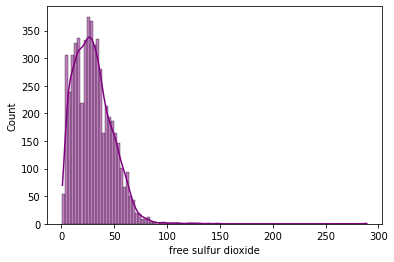

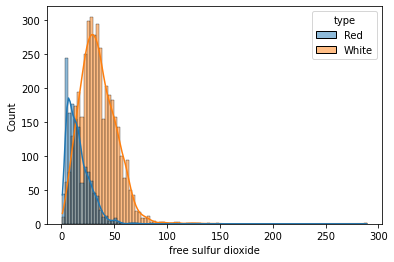

,fsd_red,fsd_white
count,1359.000000,3961.000000
mean,15.893304,34.889169
std,10.447270,17.210021
min,1.000000,2.000000
25%,7.000000,23.000000
50%,14.000000,33.000000
75%,21.000000,45.000000
max,72.000000,289.000000


In [35]:
print("std: ",df_wines['free sulfur dioxide'].std())
sns.histplot(x =df_wines['free sulfur dioxide'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'free sulfur dioxide', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_free_sulfur_dioxide = pd.concat([df_wines[df_wines['type'] == 'Red']['free sulfur dioxide'].describe(), df_wines[df_wines['type'] == 'White']['free sulfur dioxide'].describe()], axis=1)
descriptive_free_sulfur_dioxide.columns= ['fsd_red','fsd_white']
descriptive_free_sulfur_dioxide

<AxesSubplot:xlabel='type', ylabel='free sulfur dioxide'>

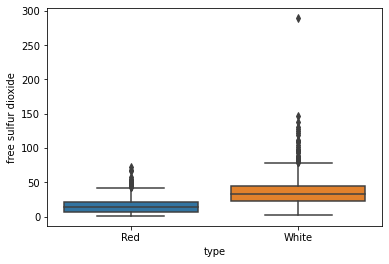

In [57]:
sns.boxplot(x='type', y='free sulfur dioxide' ,data=df_wines)

In [82]:
df_wines[((df_wines['type'] == 'White') & (df_wines['free sulfur dioxide'] > 200))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,White


In [83]:
df_wines = df_wines[~((df_wines['type'] == 'White') & (df_wines['free sulfur dioxide'] > 200))]

#### Total sulfur dioxide

std:  56.774223208496984


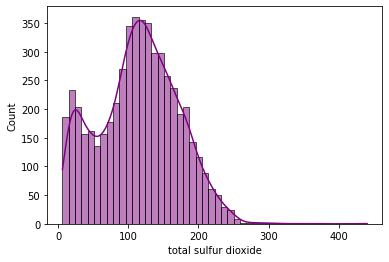

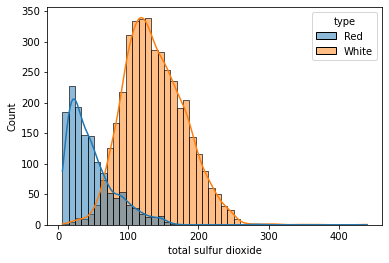

,tsd_red,tsd_white
count,1359.000000,3961.000000
mean,46.825975,137.193512
std,33.408946,43.129065
min,6.000000,9.000000
25%,22.000000,106.000000
50%,38.000000,133.000000
75%,63.000000,166.000000
max,289.000000,440.000000


In [37]:
print("std: ",df_wines['total sulfur dioxide'].std())
sns.histplot(x =df_wines['total sulfur dioxide'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'total sulfur dioxide', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_total_sulfur_dioxide = pd.concat([df_wines[df_wines['type'] == 'Red']['total sulfur dioxide'].describe(), df_wines[df_wines['type'] == 'White']['total sulfur dioxide'].describe()], axis=1)
descriptive_total_sulfur_dioxide.columns= ['tsd_red','tsd_white']
descriptive_total_sulfur_dioxide

<AxesSubplot:xlabel='type', ylabel='total sulfur dioxide'>

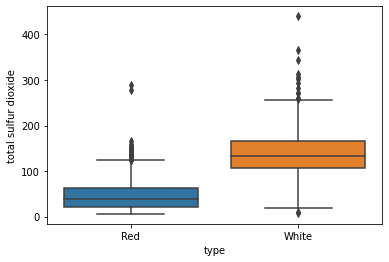

In [58]:
sns.boxplot(x='type', y='total sulfur dioxide' ,data=df_wines)

In [87]:
df_wines[((df_wines['type'] == 'Red') & (df_wines['total sulfur dioxide'] > 200))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


In [85]:
df_wines = df_wines[~((df_wines['type'] == 'Red') & (df_wines['total sulfur dioxide'] > 200))]

In [90]:
df_wines[((df_wines['type'] == 'White') & (df_wines['total sulfur dioxide'] > 310))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
325,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.9946,3.18,0.59,10.5,5,White
1417,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.0001,3.04,0.63,11.0,3,White
2127,9.1,0.33,0.38,1.70,0.062,50.5,344.0,0.9958,3.10,0.70,9.5,5,White


In [91]:
df_wines = df_wines[~((df_wines['type'] == 'White') & (df_wines['total sulfur dioxide'] > 310))]

#### Density

std:  0.0029655050633962832


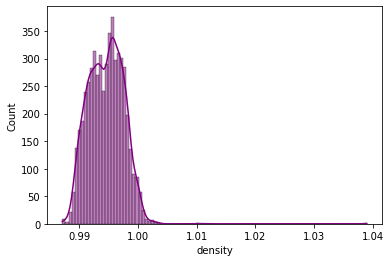

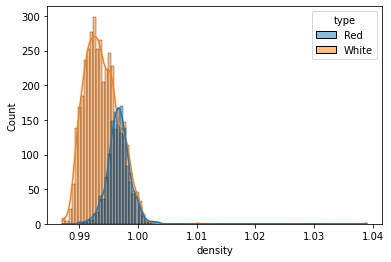

,d_red,d_white
count,1359.000000,3961.000000
mean,0.996709,0.993790
std,0.001869,0.002905
min,0.990070,0.987110
25%,0.995600,0.991620
50%,0.996700,0.993500
75%,0.997820,0.995710
max,1.003690,1.038980


In [39]:
print("std: ",df_wines['density'].std())
sns.histplot(x =df_wines['density'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'density', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_density = pd.concat([df_wines[df_wines['type'] == 'Red']['density'].describe(), df_wines[df_wines['type'] == 'White']['density'].describe()], axis=1)
descriptive_density.columns= ['d_red','d_white']
descriptive_density

<AxesSubplot:xlabel='type', ylabel='density'>

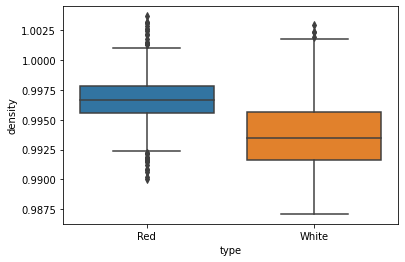

In [93]:
sns.boxplot(x='type', y='density' ,data=df_wines)

#### pH

std:  0.16019866182988043


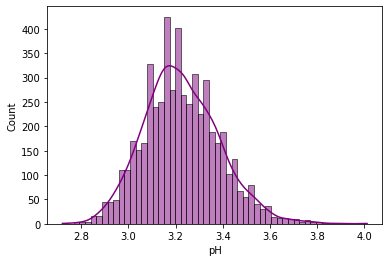

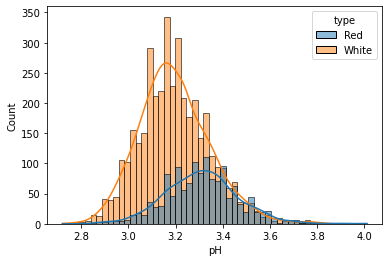

,pH_red,pH_white
count,1354.000000,3951.000000
mean,3.310694,3.195530
std,0.153879,0.151539
min,2.860000,2.720000
25%,3.210000,3.090000
50%,3.310000,3.180000
75%,3.400000,3.290000
max,4.010000,3.820000


In [94]:
print("std: ",df_wines['pH'].std())
sns.histplot(x =df_wines['pH'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'pH', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_pH = pd.concat([df_wines[df_wines['type'] == 'Red']['pH'].describe(), df_wines[df_wines['type'] == 'White']['pH'].describe()], axis=1)
descriptive_pH.columns= ['pH_red','pH_white']
descriptive_pH

<AxesSubplot:xlabel='type', ylabel='pH'>

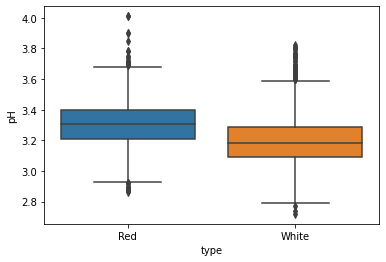

In [95]:
sns.boxplot(x='type', y='pH' ,data=df_wines)

#### Sulphates

std:  0.14817747798197978


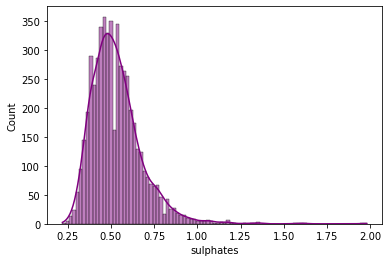

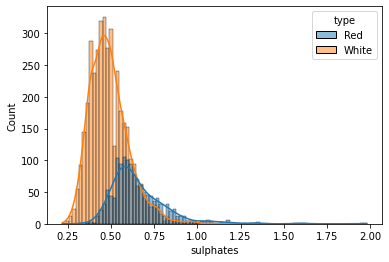

,s_red,s_white
count,1354.000000,3951.000000
mean,0.657681,0.490149
std,0.165996,0.113487
min,0.330000,0.220000
25%,0.550000,0.410000
50%,0.620000,0.480000
75%,0.730000,0.550000
max,1.980000,1.080000


In [96]:
print("std: ",df_wines['sulphates'].std())
sns.histplot(x =df_wines['sulphates'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'sulphates', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_sulphates = pd.concat([df_wines[df_wines['type'] == 'Red']['sulphates'].describe(), df_wines[df_wines['type'] == 'White']['sulphates'].describe()], axis=1)
descriptive_sulphates.columns= ['s_red','s_white']
descriptive_sulphates

<AxesSubplot:xlabel='type', ylabel='sulphates'>

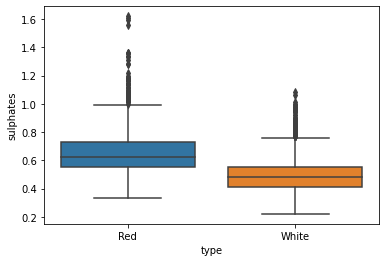

In [101]:
sns.boxplot(x='type', y='sulphates' ,data=df_wines)

In [99]:
df_wines[((df_wines['type'] == 'Red') & (df_wines['sulphates'] > 1.75))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4984,8.6,0.49,0.28,1.9,0.11,20.0,136.0,0.9972,2.93,1.95,9.9,6,Red
4990,8.6,0.49,0.29,2.0,0.11,19.0,133.0,0.9972,2.93,1.98,9.8,5,Red


In [100]:
df_wines = df_wines[~((df_wines['type'] == 'Red') & (df_wines['sulphates'] > 1.75))]

#### Alcohol

std:  1.185932928254225


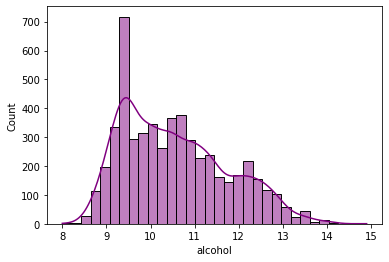

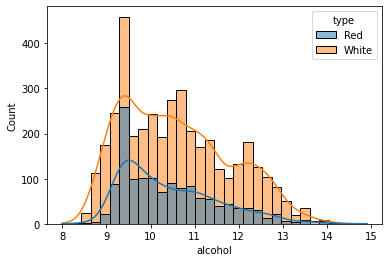

,al_red,al_white
count,1359.000000,3961.000000
mean,10.432315,10.589358
std,1.082065,1.217076
min,8.400000,8.000000
25%,9.500000,9.500000
50%,10.200000,10.400000
75%,11.100000,11.400000
max,14.900000,14.200000


In [45]:
print("std: ",df_wines['alcohol'].std())
sns.histplot(x =df_wines['alcohol'], color= 'purple', kde= True)
plt.show()
sns.histplot(x = 'alcohol', hue='type', data=df_wines, kde=True)
plt.show()
descriptive_alcohol = pd.concat([df_wines[df_wines['type'] == 'Red']['alcohol'].describe(), df_wines[df_wines['type'] == 'White']['alcohol'].describe()], axis=1)
descriptive_alcohol.columns= ['al_red','al_white']
descriptive_alcohol

<AxesSubplot:xlabel='type', ylabel='alcohol'>

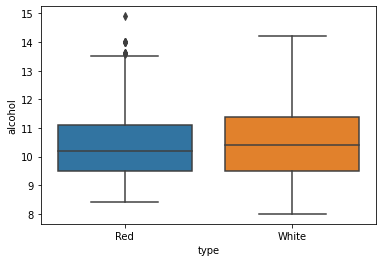

In [62]:
sns.boxplot(x='type', y='alcohol' ,data=df_wines)

In [102]:
df_wines[((df_wines['type'] == 'Red') & (df_wines['alcohol'] > 14))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5550,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,Red


In [103]:
df_wines = df_wines[~((df_wines['type'] == 'Red') & (df_wines['alcohol'] > 14))]

Anteriormente eliminamos los valores extremos evidentes en la distribucion de cada una de las variables segun su tipo de vino (Rojo o Blanco).

Para nuestro criterio de seleccion de variables, utilizamos las columnas donde la mediana de cada tipo de vino tienen diferencia. Adicionalmente descartamos la columna de quality, ya que esta columna no debe influir dentro del tipo de vino.

De igual forma, veremos que relacion tienen cada una de las variables entre ellas.

In [105]:
df_wines_numerical = df_wines.select_dtypes(include=['float64'])

In [106]:
df_wines_numerical.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


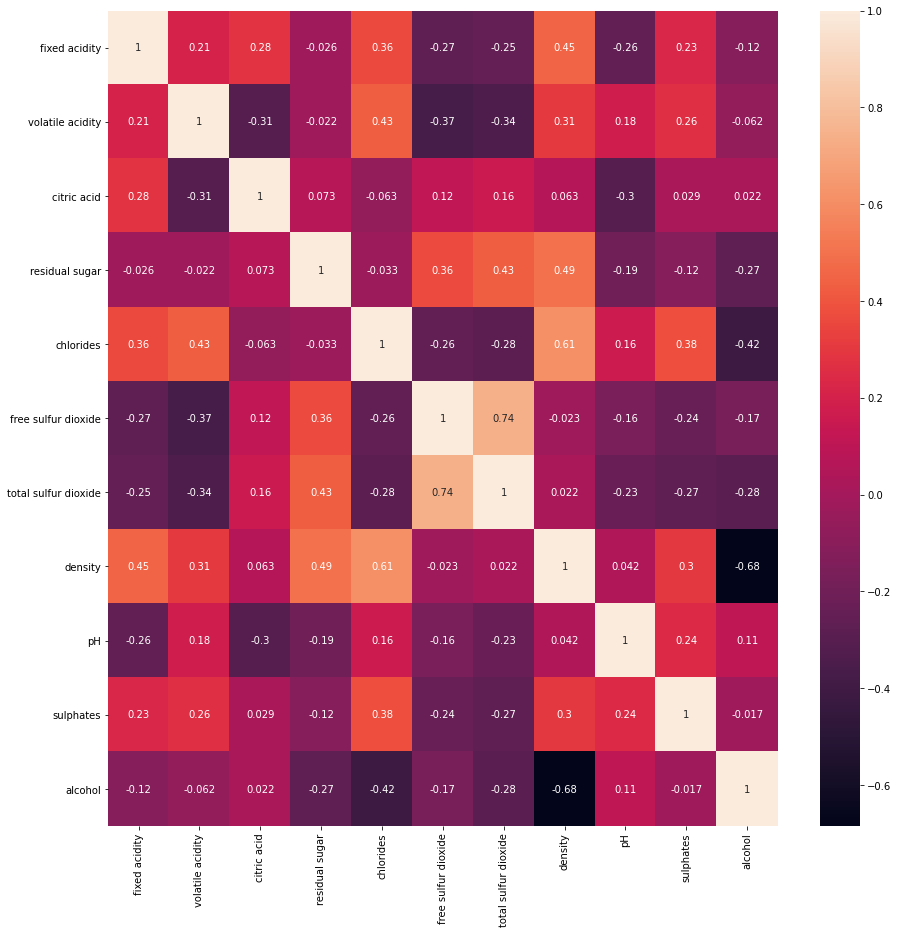

In [110]:
plt.figure(figsize = (15,15))
sns.heatmap(df_wines_numerical.corr(method='spearman'), annot=True)
plt.show()

In [116]:
df_wines_numerical.corr(method='spearman')[df_wines_numerical.corr(method='spearman') > 0.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.608936,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.741898,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,0.741898,1.000000,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,0.608936,NaN,NaN,1.000000,NaN,NaN,NaN
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [118]:
df_wines_numerical.corr(method='spearman')[df_wines_numerical.corr(method='spearman')< -0.5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric acid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.684552
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Existen 2 pares de variables con una fuerte correlacion positiva.

- 'free sulfur dioxide' vs 'total sulfur dioxide' con 0.74 
- 'density' vs 'chlorides' con 0.61

1 par de variables con una fuerte correlacion negativa.

* 'density' vs 'alcohol' con -0.68

#### ¿ Seguirà esa misma relaciòn para cada tipo de vino? Veamoslo en una figura.

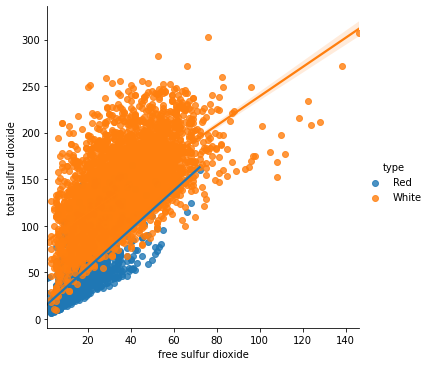

In [123]:
sns.lmplot(x='free sulfur dioxide', y= 'total sulfur dioxide', hue='type', data= df_wines)
plt.show()

La grafica muestra que por cada tipo de vino, la relacion entre ambas variables sigue siendo fuerte y positiva, mientras aumenta el valor de uno, aumenta el valor del otro

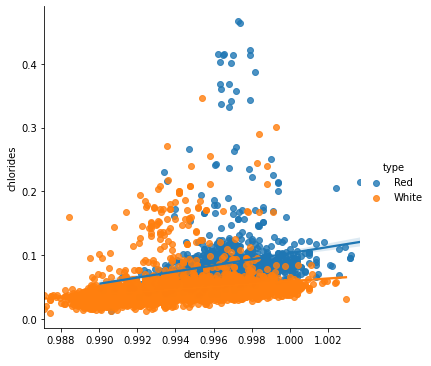

In [124]:
sns.lmplot(x='density', y= 'chlorides', hue='type', data= df_wines)
plt.show()

Aqui, las cosas cambian, aunque la relacion entre ambas variables es positiva, al momento de encontrar dicha relacion por tipo de vino, esta dismunye hasta el punto de no influir ninguna con la otra.
Esta relacion positiva se debe a los outliers que se presentan en ambos vinos.

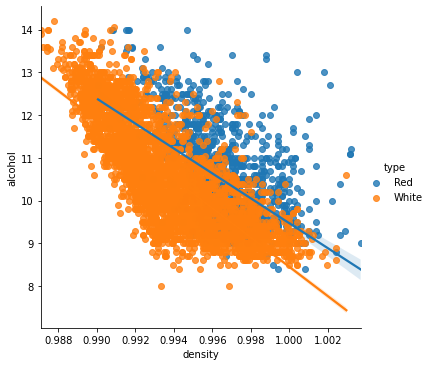

In [126]:
sns.lmplot(x='density', y= 'alcohol', hue='type', data= df_wines)
plt.show()

Y finalmente para la las variables de fuerte relacion negativa, vemos que para cada tipo de vino se mantiene dicha relacion negativa. Esto demustra que mientras aumenta la densidad del vino, hay menos cantidad de alcohol.

<AxesSubplot:xlabel='quality', ylabel='Count'>

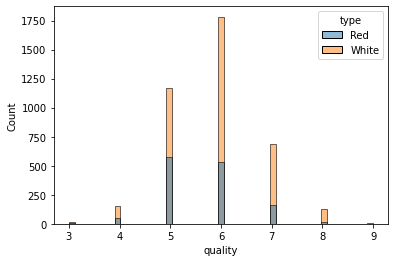

In [138]:
sns.histplot(x='quality', hue='type' ,data = df_wines)

### CONCLUSION 

- Descartamos la varible de alcohol y quality. La primera no tiene diferencia entre sus medianas teniendo en cuenta cada uno de los vinos. Y la segunda considero que no influye, pueden existir vinos blancos de mala media y buena calidad al igual que del vino tinto. El resto de variables son seleccionadas para relizar un proprocesamiento de datos y utilizar diferentes algoritmos para clasificarlos segun su tipo (rojo o blanco).